# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
filename = 'C:\\Shalin\\Springboard bootcamp\\projects\\Guided Capstone project 1\\Step 2 - Data Wrangling\\step2_output.csv'
df = pd.read_csv(filename)

df.head(5)

Unnamed: 0                 Name   Region    state  summit_elev  \
0           0       Alyeska Resort   Alaska   Alaska         3939   
1           1  Eaglecrest Ski Area   Alaska   Alaska         2600   
2           2     Hilltop Ski Area   Alaska   Alaska         2090   
3           3     Arizona Snowbowl  Arizona  Arizona        11500   
4           4  Sunrise Park Resort  Arizona  Arizona        11100   

   vertical_drop  base_elev  trams  fastEight  fastSixes  ...  LongestRun_mi  \
0           2500        250      1        0.0          0  ...            1.0   
1           1540       1200      0        0.0          0  ...            2.0   
2            294       1796      0        0.0          0  ...            1.0   
3           2300       9200      0        0.0          1  ...            2.0   
4           1800       9200      0        0.0          0  ...            1.2   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0             150.0       60.0   
1              640.0            60.0              45.0       44.0   
2               30.0            30.0             150.0       36.0   
3              777.0           104.0             122.0       81.0   
4              800.0            80.0             115.0       49.0   

   averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0            669.0          65.0          85.0              150.0   
1            350.0          47.0          53.0               90.0   
2             69.0          30.0          34.0              152.0   
3            260.0          89.0          89.0              122.0   
4            250.0          74.0          78.0              104.0   

   NightSkiing_ac  
0           550.0  
1             0.0  
2            30.0  
3             0.0  
4            80.0  

[5 rows x 28 columns]

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
df.describe()

Unnamed: 0   summit_elev  vertical_drop     base_elev       trams  \
count  330.000000    330.000000     330.000000    330.000000  330.000000   
mean   164.500000   4591.818182    1215.427273   3374.000000    0.172727   
std     95.407023   3735.535934     947.864557   3117.121621    0.559946   
min      0.000000    315.000000      60.000000     70.000000    0.000000   
25%     82.250000   1403.750000     461.250000    869.000000    0.000000   
50%    164.500000   3127.500000     964.500000   1561.500000    0.000000   
75%    246.750000   7806.000000    1800.000000   6325.250000    0.000000   
max    329.000000  13487.000000    4425.000000  10800.000000    4.000000   

        fastEight   fastSixes   fastQuads        quad     triple  ...  \
count  330.000000  330.000000  330.000000  330.000000  330.00000  ...   
mean     0.003030    0.184848    1.018182    0.933333    1.50000  ...   
std      0.055048    0.651685    2.198294    1.312245    1.61913  ...   
min      0.000000    0.000000    0.000000    0.000000    0.00000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.00000  ...   
50%      0.000000    0.000000    0.000000    0.000000    1.00000  ...   
75%      0.000000    0.000000    1.000000    1.000000    2.00000  ...   
max      1.000000    6.000000   15.000000    8.000000    8.00000  ...   

       LongestRun_mi  SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  \
count     330.000000         330.000000      330.000000        330.000000   
mean        1.411515         733.075758      180.633333         97.315152   
std         1.160673        1809.235267      308.453711         52.680468   
min         0.000000           0.000000        0.000000          0.000000   
25%         0.500000          80.000000       42.750000         75.250000   
50%         1.000000         200.000000      100.000000        105.500000   
75%         2.000000         680.000000      200.000000        130.000000   
max         6.000000       26819.000000     3379.000000        305.000000   

         yearsOpen  averageSnowfall  AdultWeekday  AdultWeekend  \
count   330.000000       330.000000    330.000000    330.000000   
mean     63.463636       177.454545     57.916957     64.166810   
std     109.319671       138.568976     23.898798     22.571324   
min       0.000000         0.000000     15.000000     17.000000   
25%      50.000000        60.000000     43.000000     49.000000   
50%      58.000000       140.000000     57.916957     64.166810   
75%      68.750000       278.750000     67.000000     72.000000   
max    2019.000000       669.000000    179.000000    179.000000   

       projectedDaysOpen  NightSkiing_ac  
count         330.000000      330.000000  
mean          102.954545       56.890909  
std            50.910444       93.464882  
min             0.000000        0.000000  
25%            90.000000        0.000000  
50%           112.500000       27.000000  
75%           136.000000       83.750000  
max           305.000000      650.000000  

[8 rows x 25 columns]

In [4]:
df.dtypes

Unnamed: 0             int64
Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

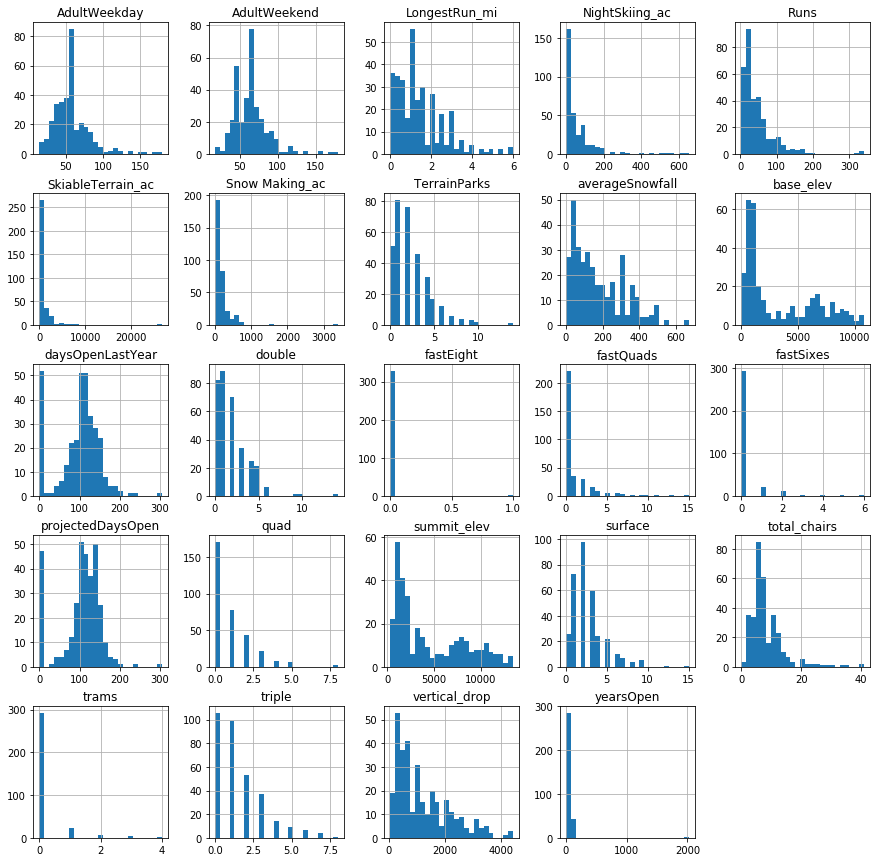

In [5]:
df_numeric = df.iloc[:,4:]
df_numeric

df_numeric.hist(bins = 25, figsize = (15,15));

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**Histogram findings**


**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

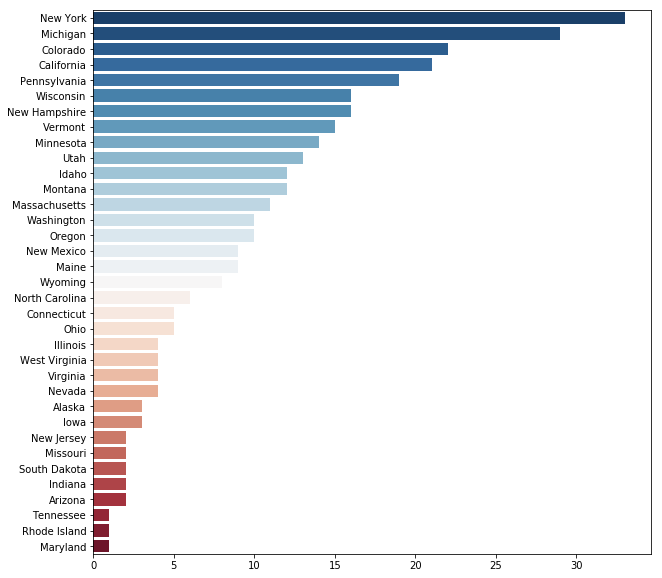

In [6]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.state.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.state)


# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

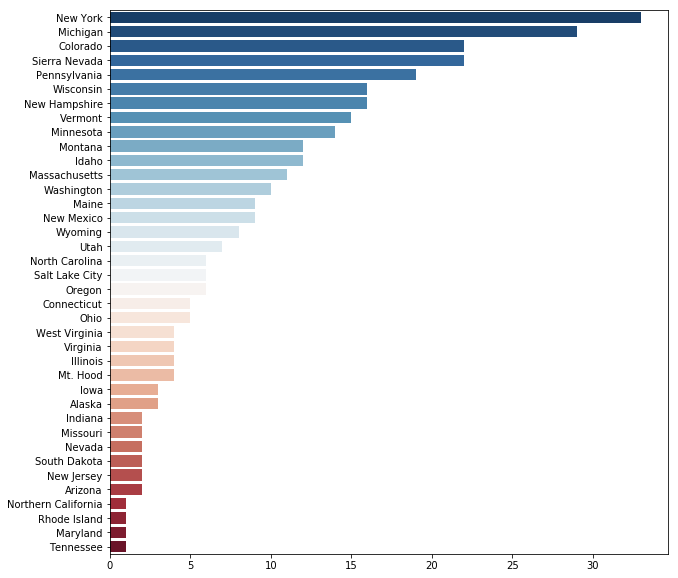

In [7]:
# Now do the same for regions! 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the regions 
y = pd.DataFrame(df.Region.value_counts())

# Get the region names by calling list() on the x.index
region_names = list(y.index)

# Get the values by plugging x.state into the list() function
region_values = list(y.Region)


# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=region_values, y=region_names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [8]:
df = df.drop('Region', axis=1)

In [9]:
df.columns

Index(['Unnamed: 0', 'Name', 'state', 'summit_elev', 'vertical_drop',
       'base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

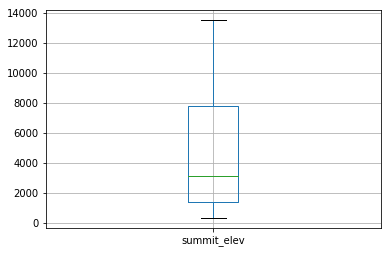

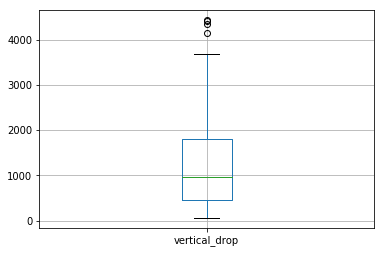

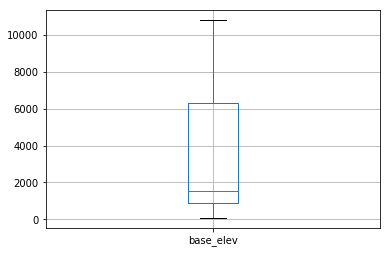

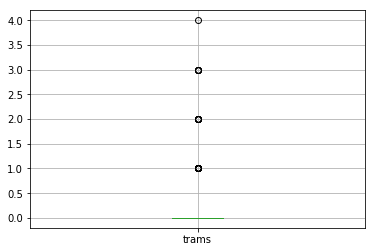

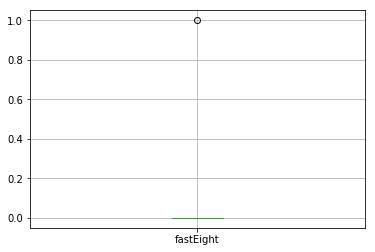

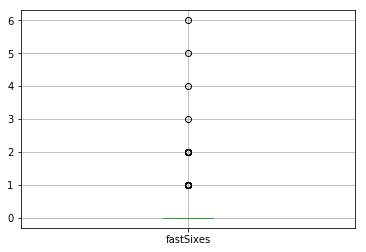

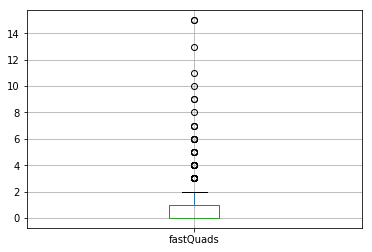

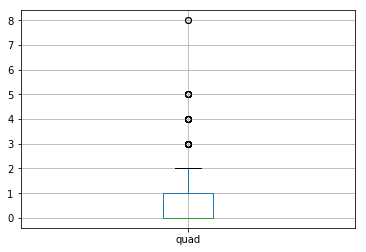

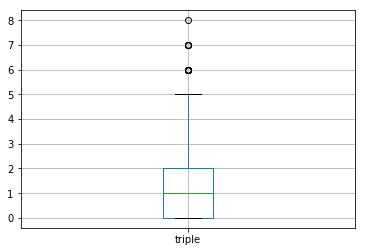

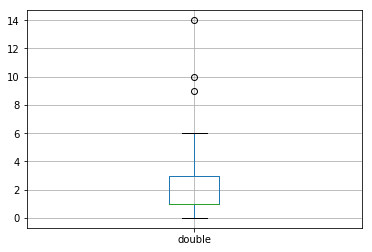

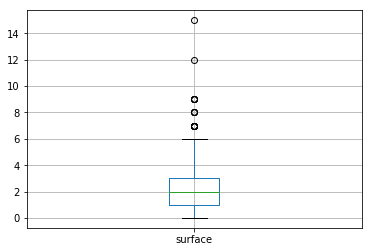

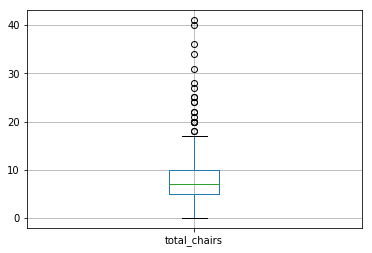

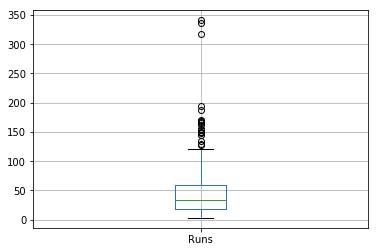

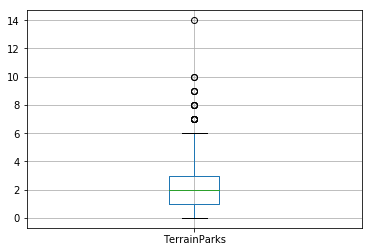

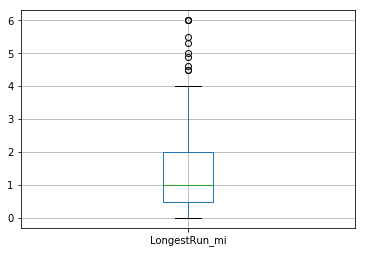

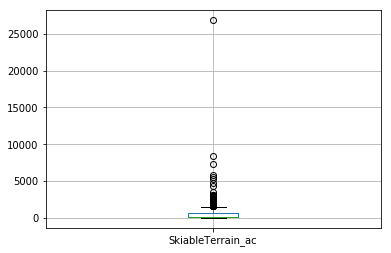

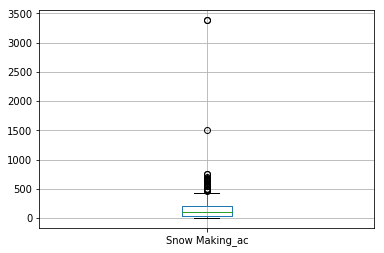

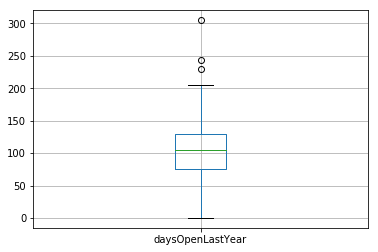

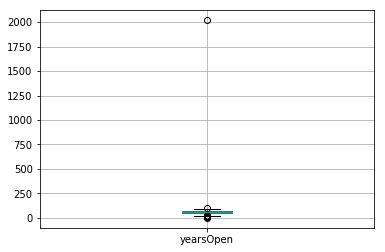

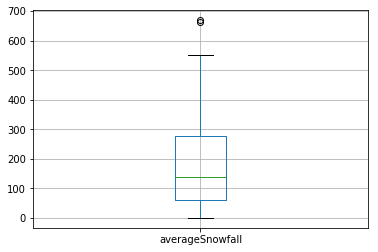

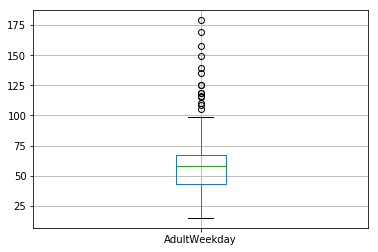

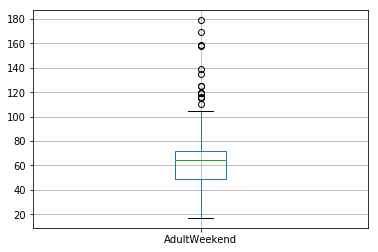

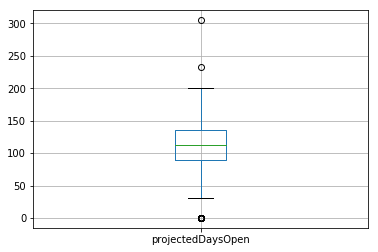

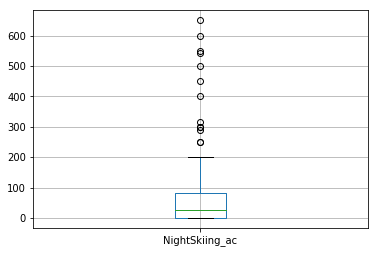

In [10]:
#Build boxplot for each dataframe variable just to get a sense of range (just for reference.not scope of this project)      
for column in df_numeric:
    plt.figure()
    #sns.boxplot([column]);
    df_numeric.boxplot([column])

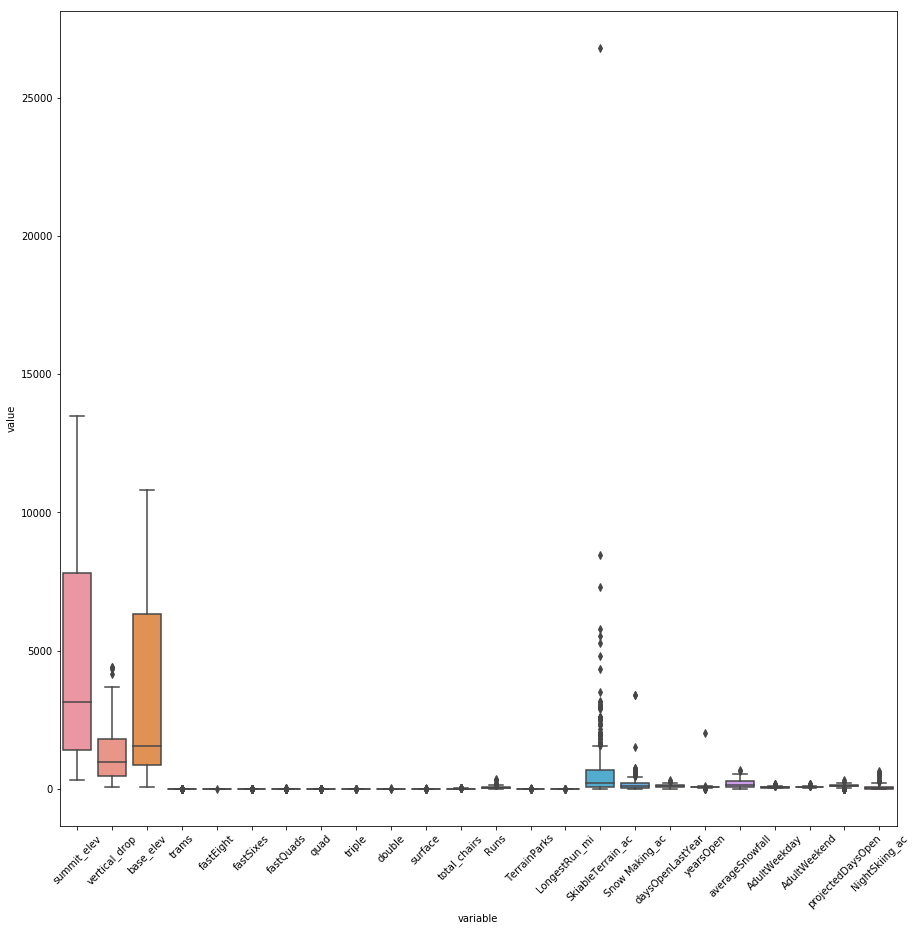

In [11]:
f, ax = plt.subplots(figsize=(15, 15))
xticklabels = df_numeric.columns

chart = sns.boxplot(x="variable", y="value", data=pd.melt(df_numeric));
chart.set_xticklabels(xticklabels, rotation=45);

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed</font>

Hint: Recall from your statistics prework that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

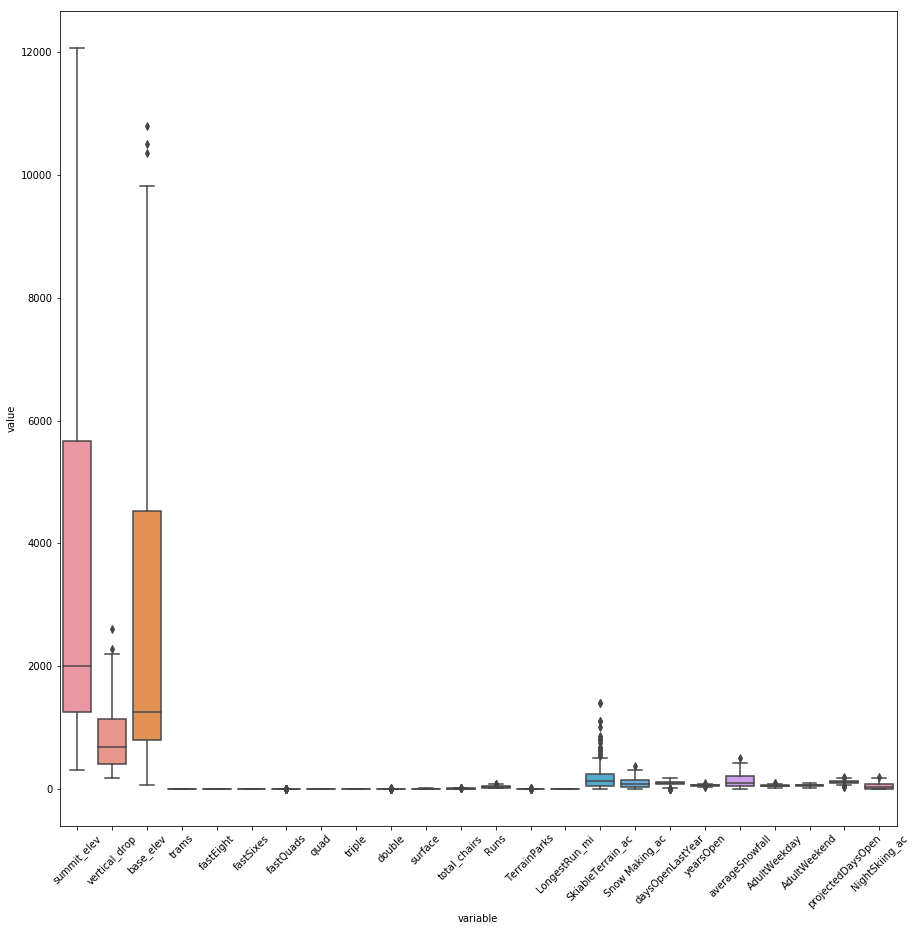

In [12]:
# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df_numeric.quantile(0.25, numeric_only=True)

# Now get Q3 and store in a variable called Q3. 
Q3 = df_numeric.quantile(0.75, numeric_only=True)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3-Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
dfno = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric> (Q3 + 1.5 * IQR))).any(axis=1)]
dfno

# We now want to make a boxplot of this new dataframe dfno. 
f, ax = plt.subplots(figsize=(15, 15))
xticklabels = dfno.columns

chart = sns.boxplot(x="variable", y="value", data=pd.melt(dfno));
chart.set_xticklabels(xticklabels, rotation=45);

In [13]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 
df_numeric.shape

(330, 24)

In [14]:
dfno.shape

(154, 24)

There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in units 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in Step 1 of this guided capstone. However, for the rest of this guided capstone project, we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

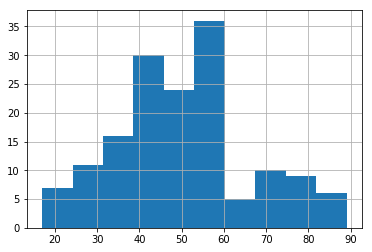

In [15]:
# Make a histogram of the 'AdultWeekday' column of the dfno dataframe. 
# You'll want to call hist() on that column 
dfno['AdultWeekday'].hist()

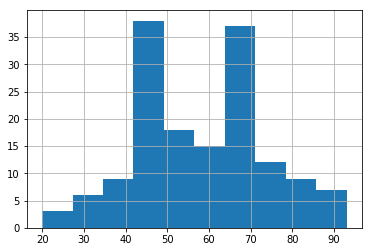

In [16]:
# Do the same but with the AdultWeekend column 
dfno['AdultWeekend'].hist()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

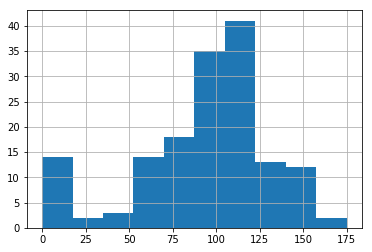

In [17]:
# Do the same as above! You got this :) 
dfno['daysOpenLastYear'].hist()

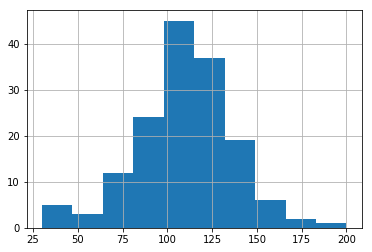

In [18]:
dfno['projectedDaysOpen'].hist()

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

Hint: pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

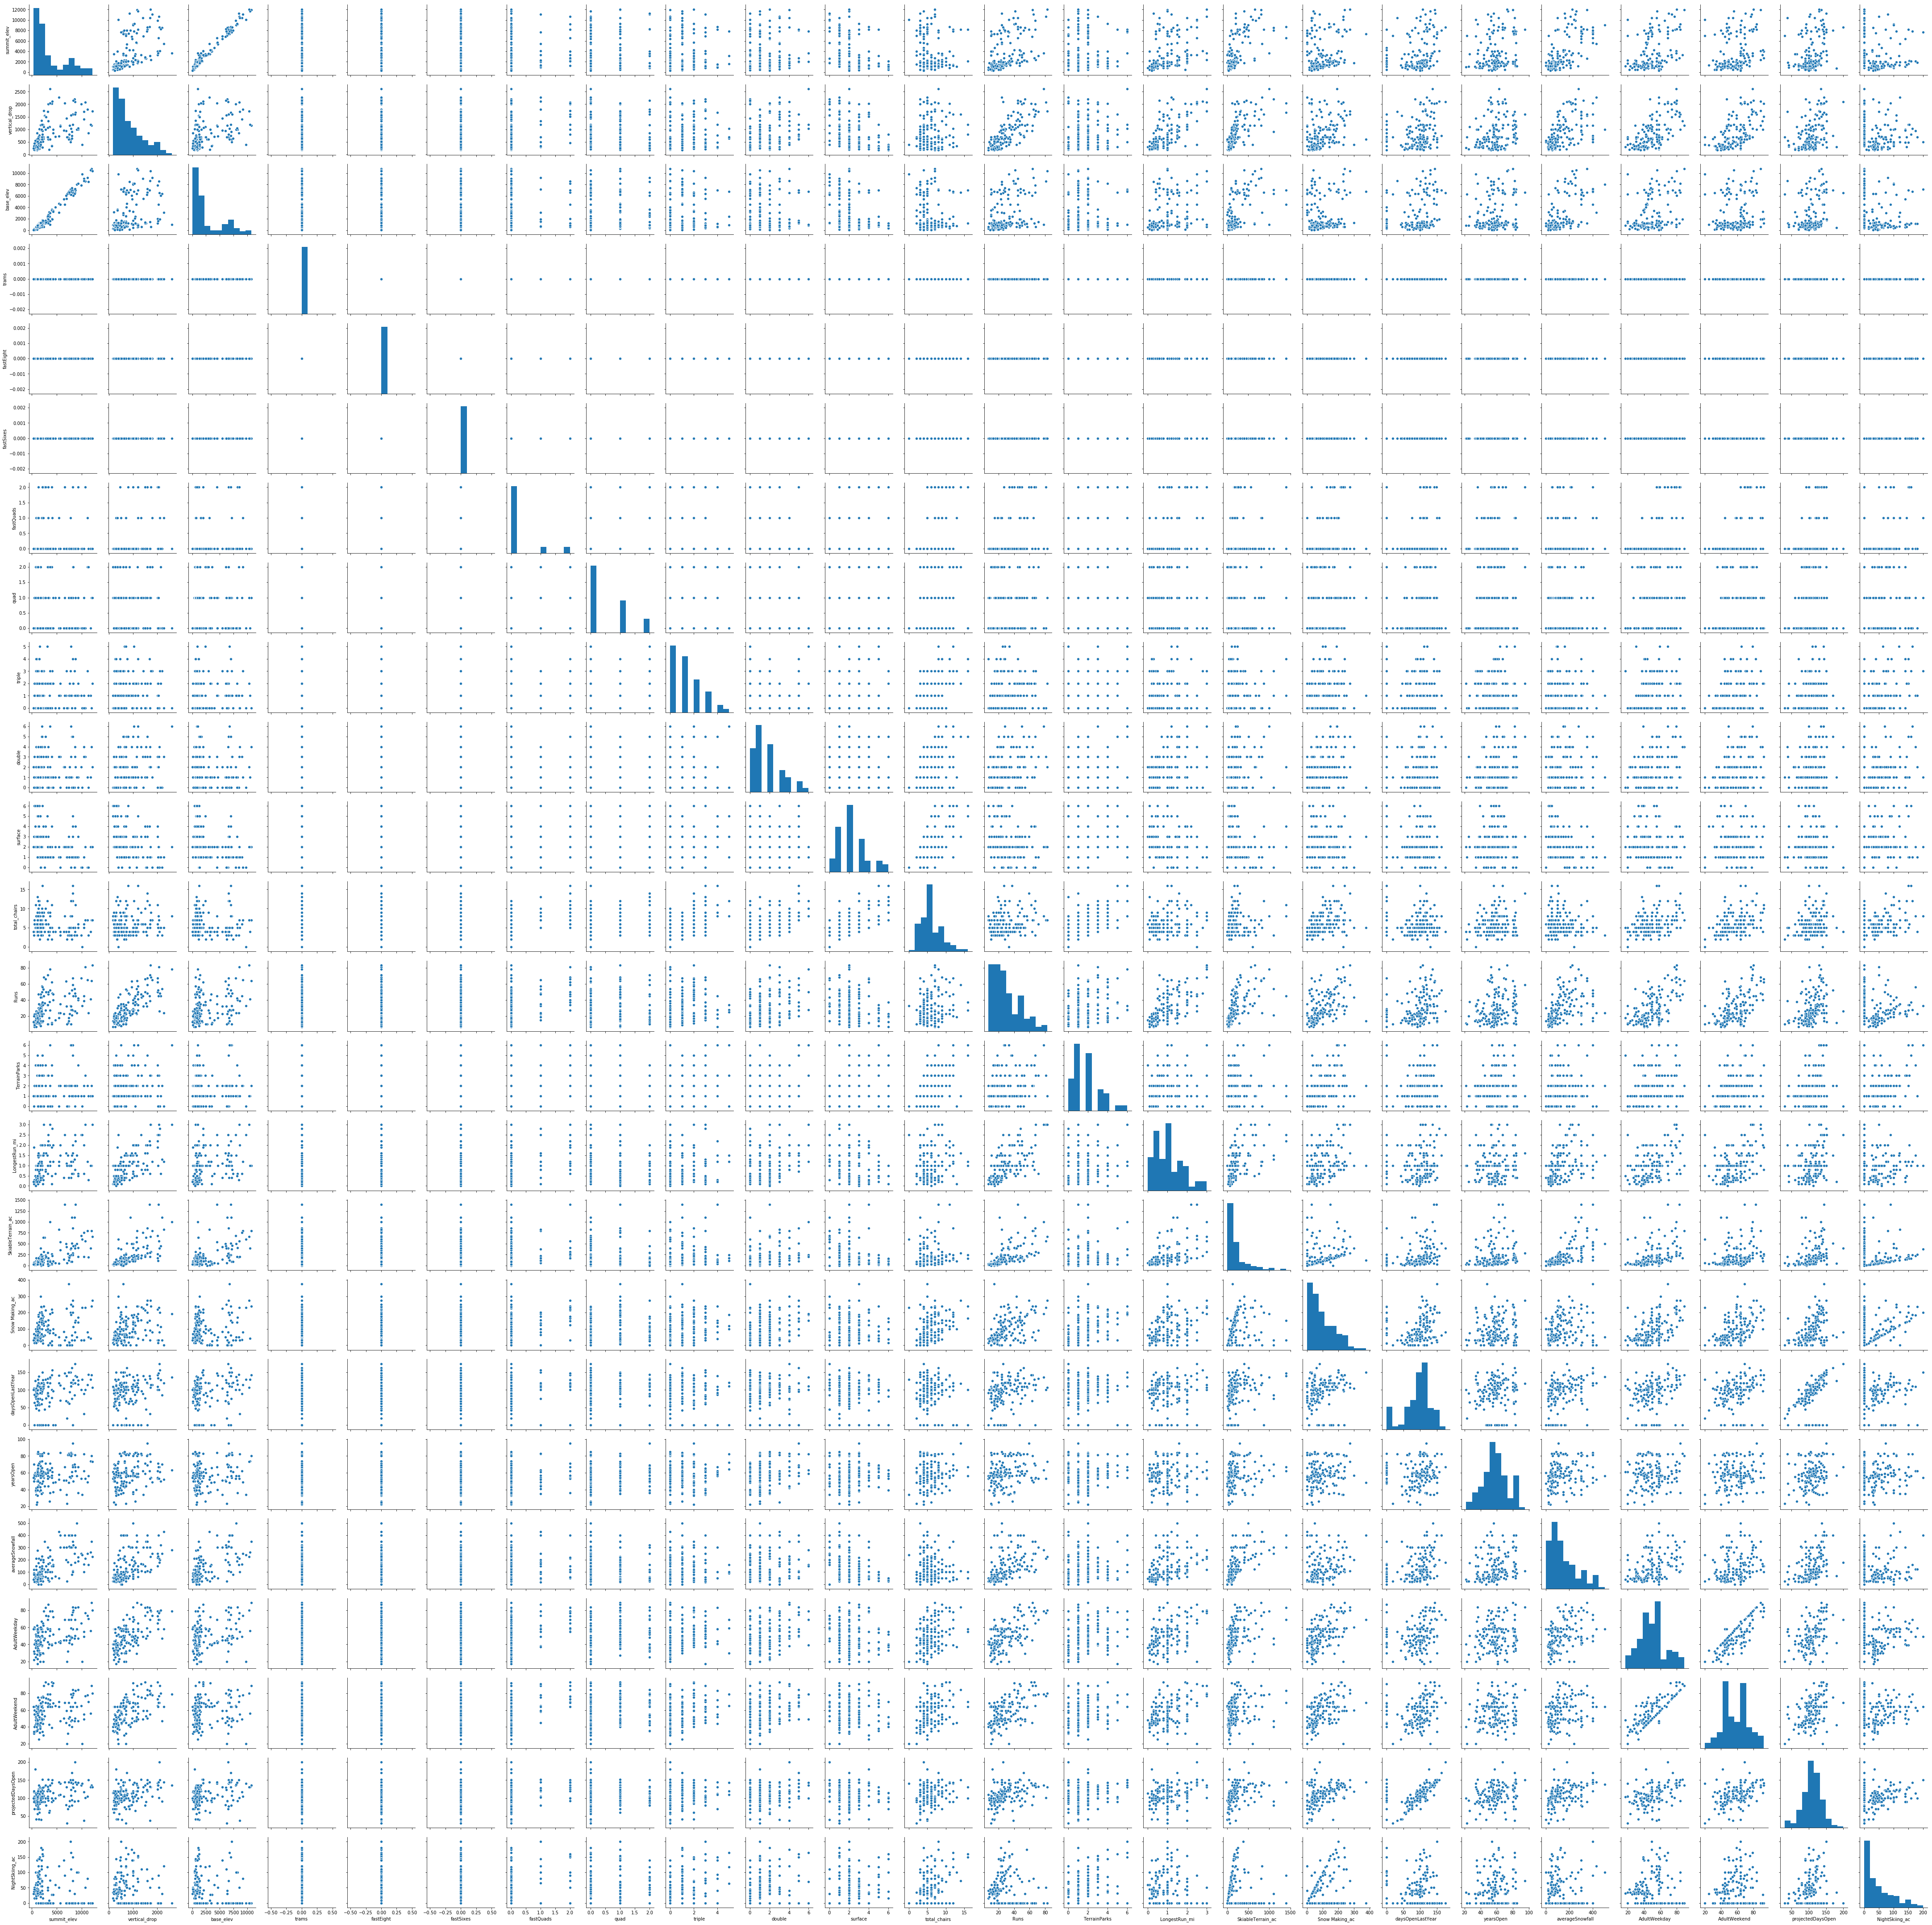

In [19]:
dfno_first12 = dfno.iloc[:,0:12]
dfno_second12 = dfno.iloc[:,12:24]

g = sns.pairplot(dfno)

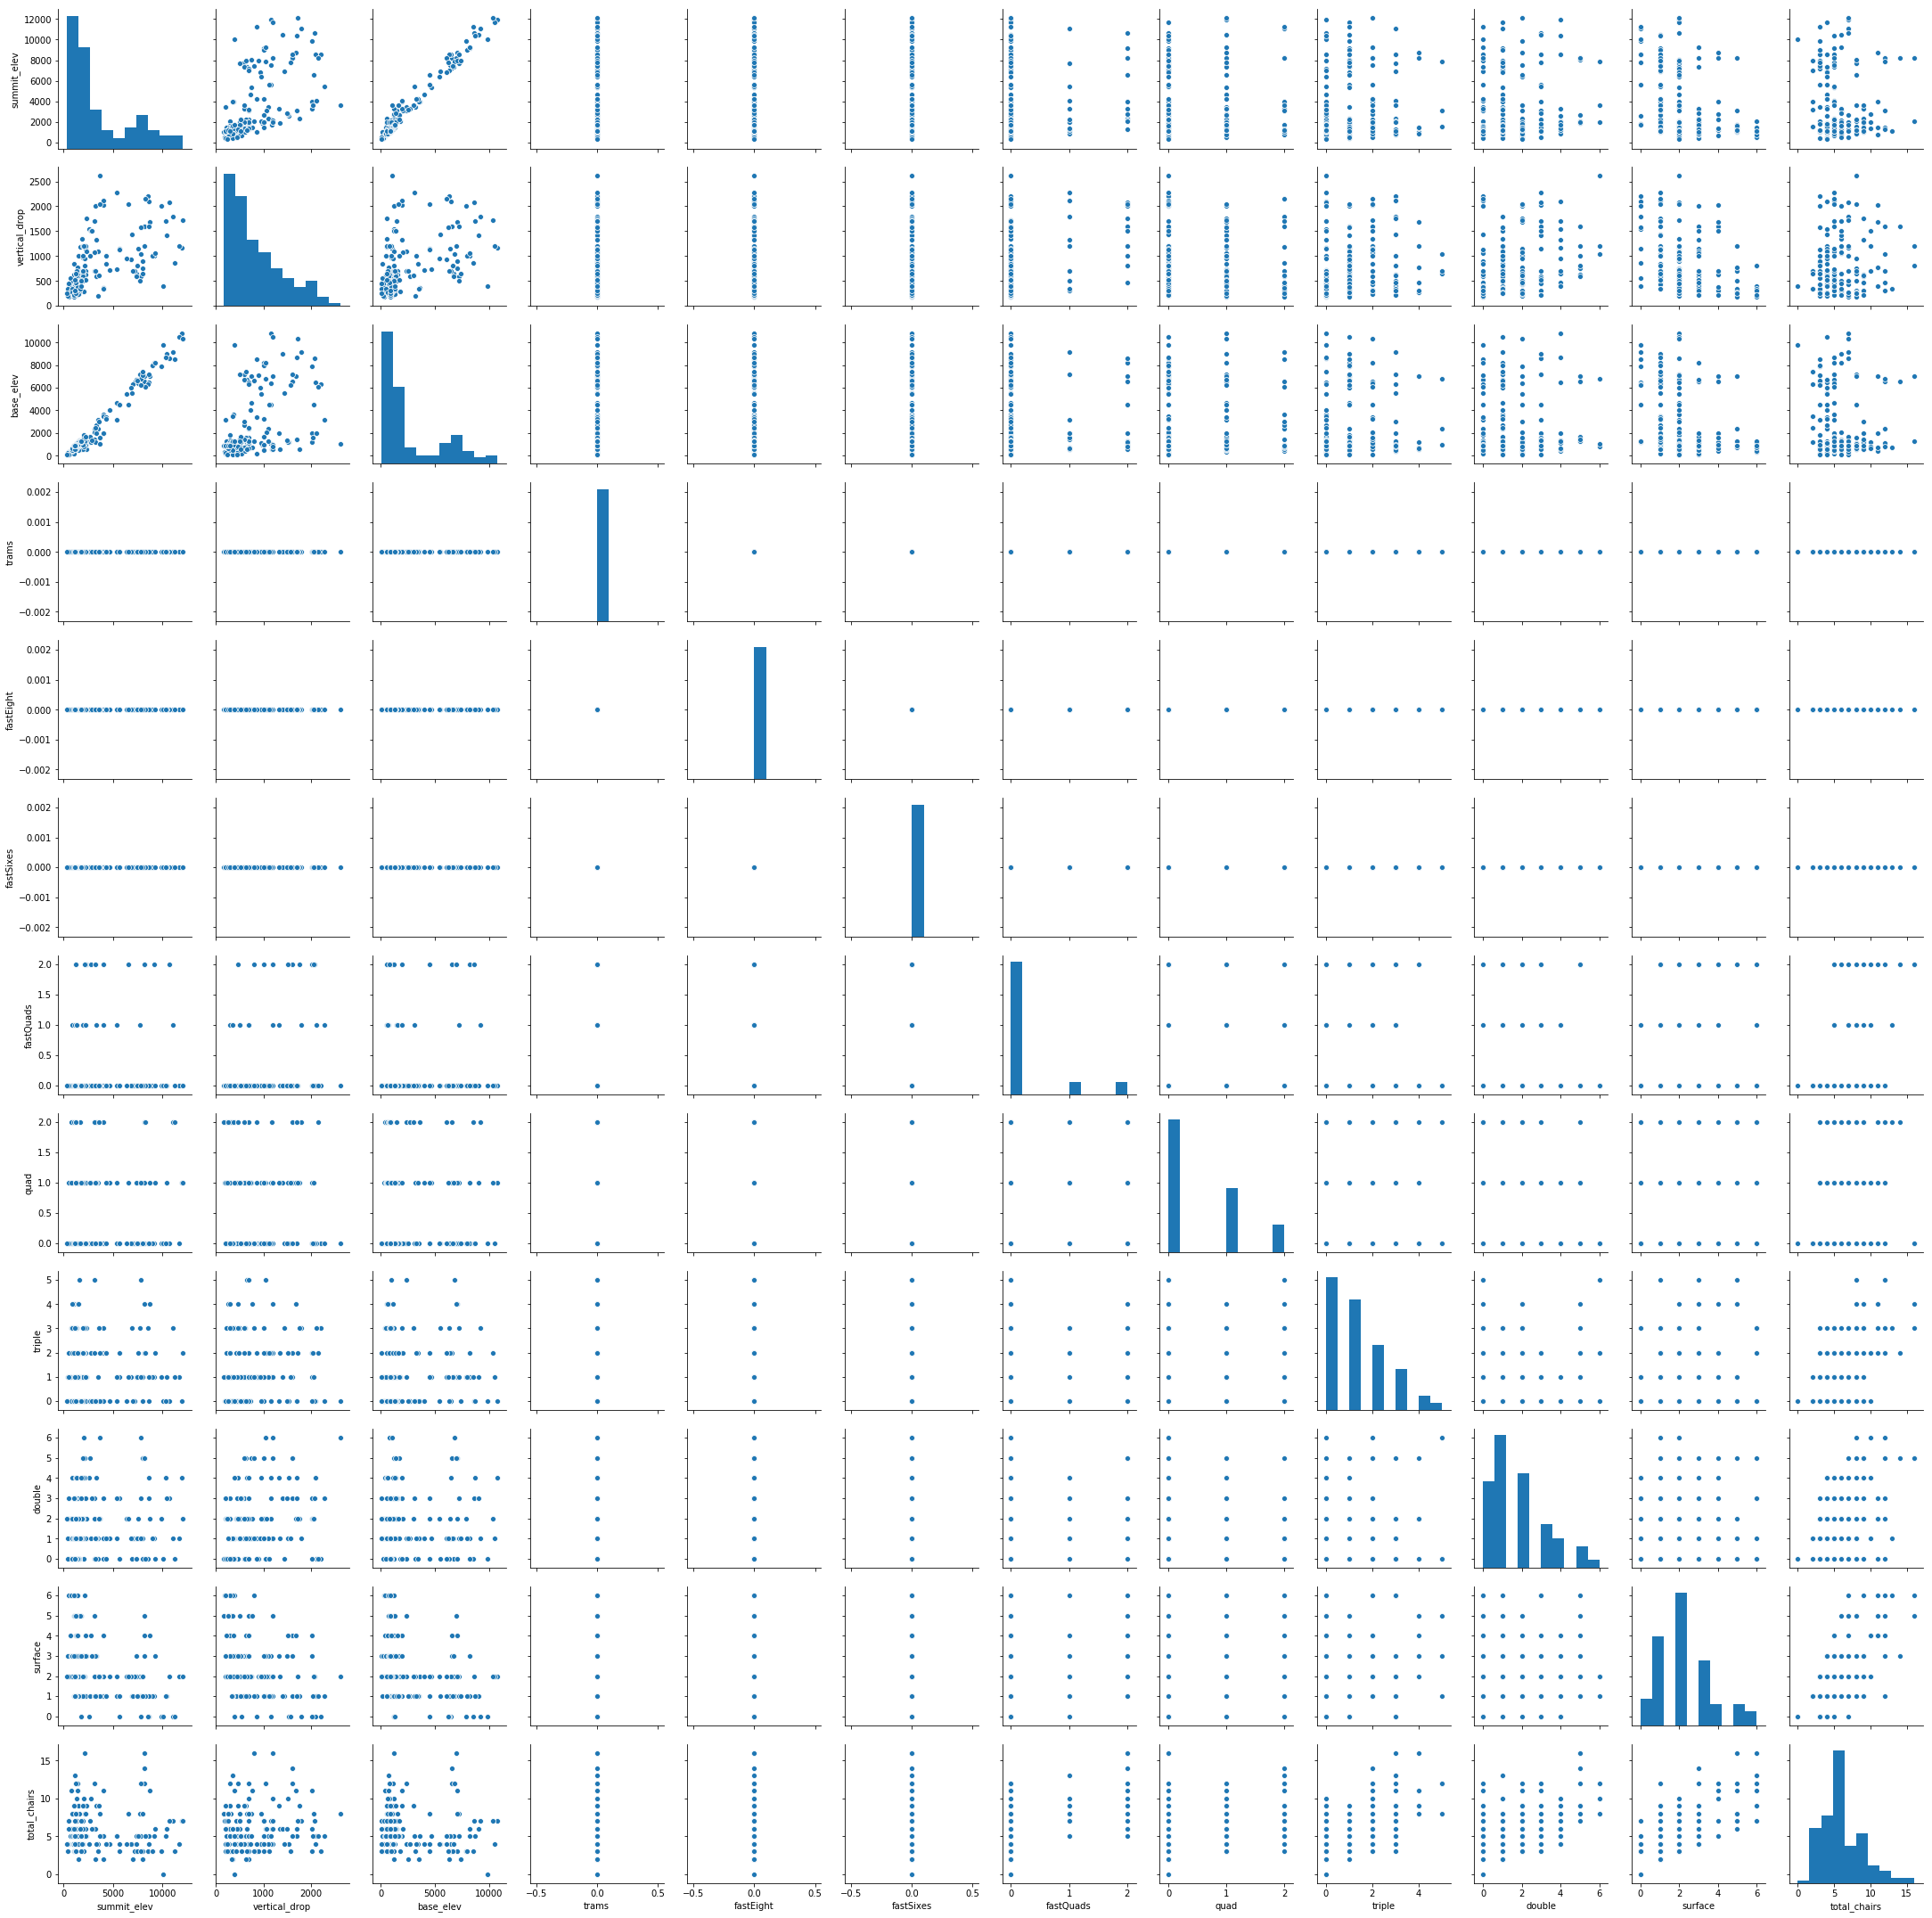

In [20]:
g = sns.pairplot(dfno_first12)

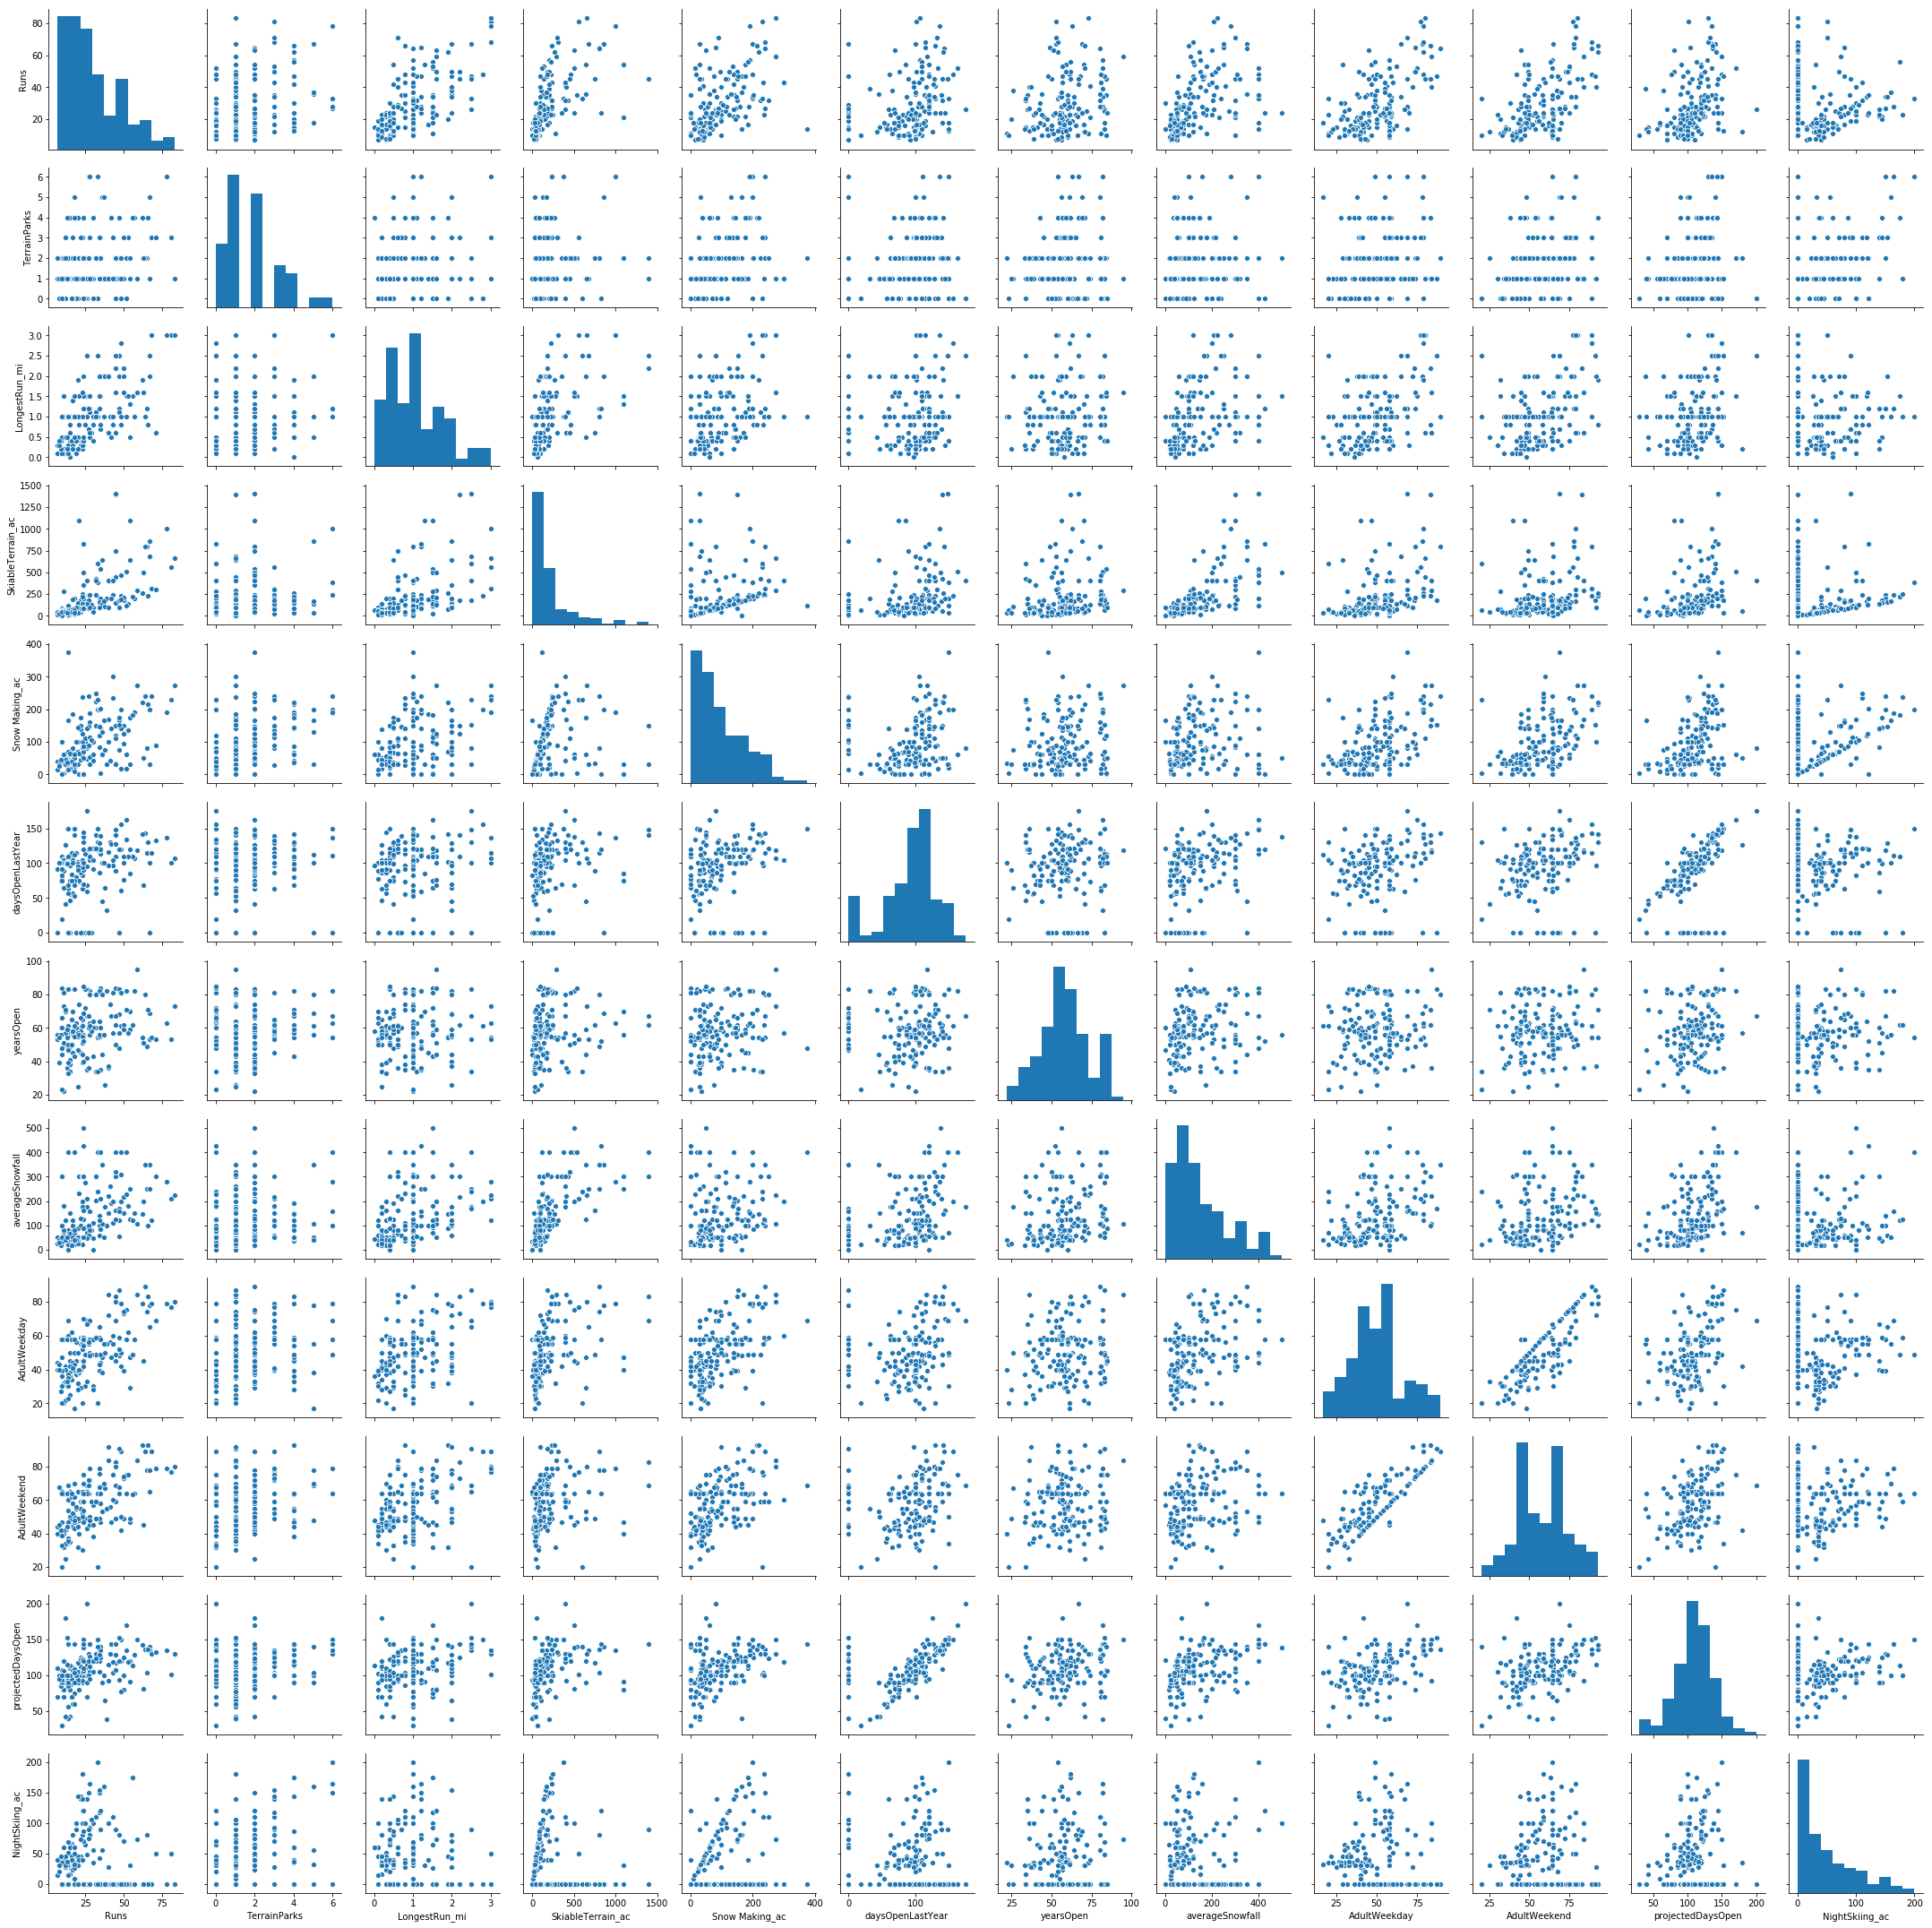

In [21]:
g = sns.pairplot(dfno_second12)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [22]:
dfno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 1 to 327
Data columns (total 24 columns):
summit_elev          154 non-null int64
vertical_drop        154 non-null int64
base_elev            154 non-null int64
trams                154 non-null int64
fastEight            154 non-null float64
fastSixes            154 non-null int64
fastQuads            154 non-null int64
quad                 154 non-null int64
triple               154 non-null int64
double               154 non-null int64
surface              154 non-null int64
total_chairs         154 non-null int64
Runs                 154 non-null float64
TerrainParks         154 non-null float64
LongestRun_mi        154 non-null float64
SkiableTerrain_ac    154 non-null float64
Snow Making_ac       154 non-null float64
daysOpenLastYear     154 non-null float64
yearsOpen            154 non-null float64
averageSnowfall      154 non-null float64
AdultWeekday         154 non-null float64
AdultWeekend         154 non-null f

C:\Users\gosal\Anaconda3_2\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\gosal\Anaconda3_2\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


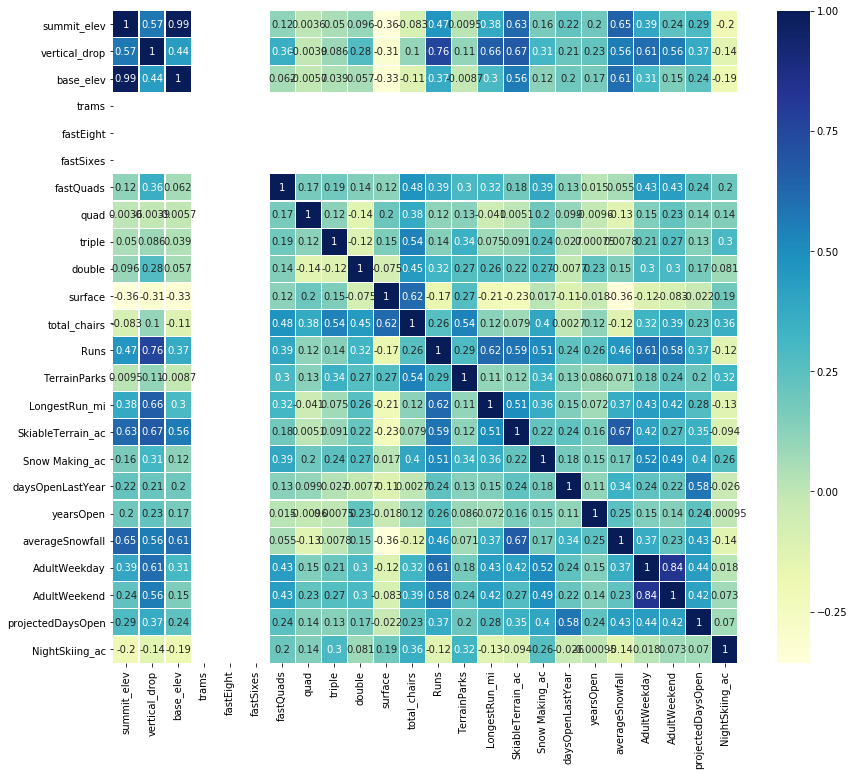

In [23]:
#Calculate the correlation coefficients
corr = dfno.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)

#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [24]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfno.corr().abs()
#corr_matrix

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [25]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [26]:
print('Reduced dataframe size: ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size:  (154, 23)


In [27]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
dfno.drop(dfno[to_drop], axis=1, inplace=True)

C:\Users\gosal\Anaconda3_2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
dfno.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'TerrainParks', 'LongestRun_mi', 'SkiableTerrain_ac',
       'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
       'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 

In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [29]:
from sklearn.cluster import KMeans
x = dfno.values
x

array([[ 2600.,  1540.,     0., ...,    53.,    90.,     0.],
       [ 2090.,   294.,     0., ...,    34.,   152.,    30.],
       [11100.,  1800.,     0., ...,    78.,   104.,    80.],
       ...,
       [ 8000.,   640.,     0., ...,    48.,    95.,     0.],
       [ 7428.,   810.,     0., ...,    42.,    77.,     0.],
       [ 7808.,  1571.,     0., ...,    59.,   123.,   110.]])

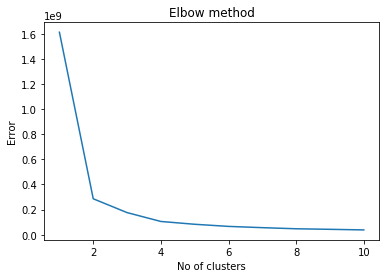

In [30]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

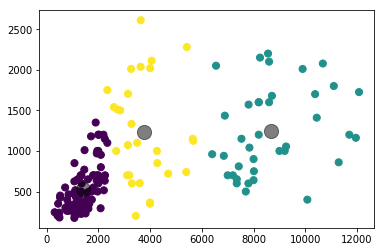

In [31]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [32]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
dfno['clusters'] = y_kmeans3

C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
# Write your dataframe to csv 
dfno.to_csv('step3_output.csv', index=False)